In [2]:
#!pip install seaborn
!pip install geopandas

  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
     |████████████████████████████████| 15.4 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 10.9 MB/s eta 0:00:01
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


In [3]:
import pandas as pd
import os
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

In [4]:
ibtracs_directory = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/"

In [4]:
#os.system("wget %s" %(ibtracs_directory+"ibtracs.NA.list.v04r00.csv"))

In [62]:
df_NA = pd.read_csv("ibtracs.NA.list.v04r00.csv",low_memory=False)
df_NA = df_NA.iloc[1:]

In [63]:
df_NA.shape

(122825, 163)

In [64]:
df_NA.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,...,,,,,,,,,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,...,,,,,,,,,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,...,,,,,,,,,6,290
4,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 21:00:00,TS,26.3999,-91.3001,...,,,,,,,,,6,290


In [65]:
df_NA.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON',
       ...
       'BOM_GUST_PER', 'REUNION_GUST', 'REUNION_GUST_PER', 'USA_SEAHGT',
       'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW', 'USA_SEARAD_NW',
       'STORM_SPEED', 'STORM_DIR'],
      dtype='object', length=163)

In [67]:
df_NA['MONTH'] = df_NA['ISO_TIME'].apply(lambda x: int(x.split('-')[1]))

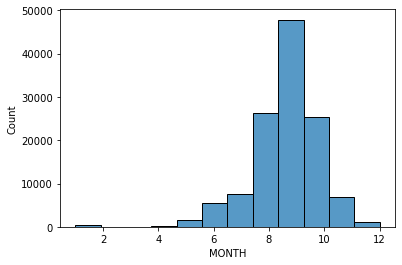

In [68]:
sns.histplot(x='MONTH',data=df_NA,bins=12)
plt.show()

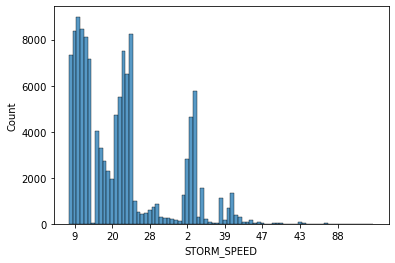

In [69]:
sns.histplot(x='STORM_SPEED',data=df_NA)
plt.xticks(np.arange(1, 80, 10.0))
plt.show()

In [71]:
df_NA['YEAR'] = df_NA['ISO_TIME'].apply(lambda x: int(x.split('-')[0]))

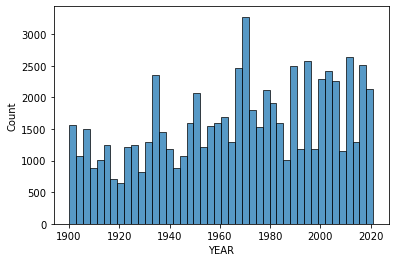

In [83]:
sns.histplot(x='YEAR',data=df_NA)
plt.show()

In [87]:
df_NA = df_NA[(df_NA['YEAR']>=2000) & 
              (df_NA['USA_STATUS'].apply(lambda x: any(x==y for y in ['TD','TS','DB','TC','HU','HR'])))]

In [88]:
storm_dates = pd.DataFrame()
storm_dates['MIN_DATE'] = df_NA.groupby('SID')['ISO_TIME'].apply(min)

In [89]:
storm_dates['MAX_DATE'] = df_NA.groupby('SID')['ISO_TIME'].apply(max)

In [90]:
storm_dates.reset_index(inplace=True)

In [91]:
storm_dates['DATES'] = ''
storm_dates['LABELS'] = ''
storm_dates['LATS'] = ''
storm_dates['LONS'] = ''
storm_dates['INIT_LABEL'] = ''
storm_dates['FINAL_LABEL'] = ''
for i in range(storm_dates.shape[0]):
    min_date = storm_dates.iloc[i]['MIN_DATE']
    max_date = storm_dates.iloc[i]['MAX_DATE']
    sid = storm_dates.iloc[i]['SID']
    dates = df_NA[(df_NA['SID']==sid)]['ISO_TIME'].values
    labels = df_NA[(df_NA['SID']==sid)]['USA_STATUS'].values
    lats = df_NA[(df_NA['SID']==sid)]['LAT'].values
    lons = df_NA[(df_NA['SID']==sid)]['LON'].values
    storm_dates.at[i,'DATES']=dates
    storm_dates.at[i,'LABELS']=labels
    storm_dates.at[i,'LATS']=lats.astype(float)
    storm_dates.at[i,'LONS']=lons.astype(float)
    storm_dates.at[i,'INIT_LABEL']=labels[0]
    storm_dates.at[i,'FINAL_LABEL']=labels[-1]

In [92]:
storm_dates.sort_values(by='MAX_DATE',inplace=True,ascending=False)

In [93]:
storm_dates.head()

,SID,MIN_DATE,MAX_DATE,DATES,STATUS,LATS,LONS,MIN_STATUS,MAX_STATUS
369,2021222N12339,2021-08-09 18:00:00,2021-08-15 00:00:00,"[2021-08-09 18:00:00, 2021-08-09 21:00:00, 202...","[DB, DB, DB, DB, DB, DB, DB, DB, DB, DB, DB, D...","[11.5, 11.5006, 11.5, 11.4997, 11.5, 11.4849, ...","[-20.6, -21.5025, -22.4, -23.2925, -24.2, -25....",DB,TS
368,2021220N11311,2021-08-07 18:00:00,2021-08-15 00:00:00,"[2021-08-07 18:00:00, 2021-08-07 21:00:00, 202...","[DB, DB, DB, DB, TS, TS, TS, TS, TS, TS, TS, T...","[11.2, 11.2452, 11.3, 11.3773, 17.4, 17.5984, ...","[-49.3, -49.7974, -50.3, -50.8201, -66.1, -66....",DB,DB
367,2021182N09317,2021-07-01 00:00:00,2021-07-09 15:00:00,"[2021-07-01 00:00:00, 2021-07-01 03:00:00, 202...","[TD, TD, TS, TS, TS, TS, TS, TS, TS, TS, TS, T...","[9.47143, 9.44726, 9.52153, 9.76311, 10.0603, ...","[-45.3571, -46.5276, -47.6854, -48.8909, -50.1...",TD,TS
366,2021178N28295,2021-06-26 12:00:00,2021-06-29 06:00:00,"[2021-06-26 12:00:00, 2021-06-26 15:00:00, 202...","[DB, DB, DB, DB, DB, DB, TD, TD, TS, TS, TS, T...","[28.2, 28.3034, 28.4, 28.492, 28.6, 28.7347, 3...","[-64.9, -65.6996, -66.5, -67.3003, -68.1, -68....",DB,DB
365,2021166N20265,2021-06-19 06:00:00,2021-06-22 00:00:00,"[2021-06-19 06:00:00, 2021-06-19 09:00:00, 202...","[TS, TS, TS, TS, TS, TS, TD, TD, TD, TD, TD, T...","[29.2, 29.8125, 30.5, 31.2031, 31.8, 32.1517, ...","[-91.0, -90.5977, -90.0, -89.2939, -88.6, -88....",TS,TS


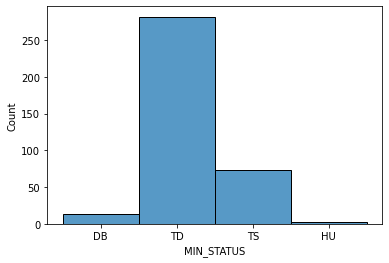

In [94]:
sns.histplot(x='INIT_LABEL',data=storm_dates)
plt.show()

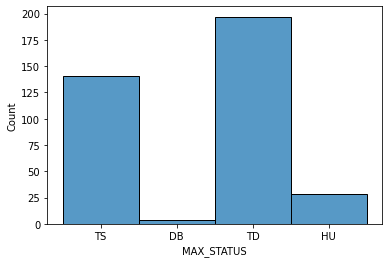

In [95]:
sns.histplot(x='FINAL_LABEL',data=storm_dates)
plt.show()

In [96]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [97]:
colors = {'TD':'blue', 'TS':'purple', 'HU':'red', 'DB':'pink'}
color_map = lambda x: colors[x]

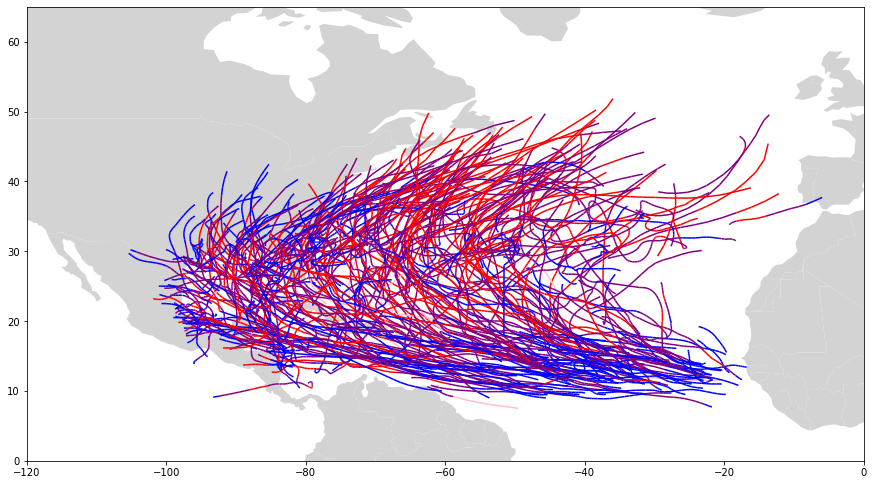

In [98]:
fig, ax = plt.subplots(figsize=(15,10))
countries.plot(color="lightgrey",ax=ax)
for i in range(storm_dates.shape[0]):
    cmap = ListedColormap([color_map(x) for x in storm_dates.iloc[i]['LABELS']])
    x = storm_dates.iloc[i]['LONS']
    y = storm_dates.iloc[i]['LATS']
    xy = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.hstack([xy[:-1], xy[1:]])
    lc = LineCollection(segments, cmap = cmap)
    lc.set_array(y)
    ax.add_collection(lc)
    
plt.ylim(0,65)
plt.xlim(-120,0)
plt.show()

In [100]:
storm_dates.to_csv('storm_dates.csv',index=False)